In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import sys
sys.path.insert(0, '../lib')
sys.path.insert(0, '../src')

import ml_estimation as ml
import model1_plots as mp
import model1 as mod1
from scipy.stats import norm, beta
from statsmodels.base.model import GenericLikelihoodModel


In [2]:
df = pd.read_csv('../mod/model1/example_bins.csv')
df_bin_fit = pd.read_csv('../mod/model1/examble_bins_fit.csv')

In [3]:
df_bin_fit.head()

,Unnamed: 0,bincenter_h,bincenter_d,alpha,beta,conv_balpha1,beta1,alpha2,beta2,p,conv_mb,mu,sigma,alpha1,conv_b
0,0,1000.0,0,0.652303,2.632243,NaN,2.632273,NaN,NaN,1.000000,True,0.524033,0.722187,0.652303,1.0
1,1,6000.0,0,1.040661,1.295376,NaN,1.703025,1.046529,26.551131,0.901778,True,0.418379,0.681215,1.748397,True
2,2,9000.0,0,1.240030,1.103489,NaN,2.700983,0.868229,1.717052,0.574454,True,0.393134,0.682773,7.043817,True
3,3,12000.0,0,3.346579,1.380626,NaN,1.380623,NaN,NaN,1.000000,True,0.331026,0.595683,3.346595,True
4,4,1000.0,1,0.961459,7.837352,NaN,7.837276,NaN,NaN,1.000000,True,1.174367,0.719539,0.961449,True


In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,h_t,d_t,ct,cloud,h_t_next,d_t_next,ct_next,cloud_next,dh,dd,bincenter_h,bincenter_d
0,7902,7902,1242.484253,0.027543,2.0,cloud,13641.080078,-0.046382,4.0,cloud,12398.595825,-0.073925,1000.0,0
1,11449,11449,773.386169,0.076220,2.0,cloud,1017.549133,2.079899,5.0,cloud,244.162964,2.003679,1000.0,0
2,11676,11676,705.325745,-0.011202,2.0,cloud,493.514404,0.596952,2.0,cloud,-211.811340,0.608154,1000.0,0
3,12949,12949,1160.384521,-0.088163,2.0,cloud,943.995056,1.255223,2.0,cloud,-216.389465,1.343387,1000.0,0
4,24208,24208,1236.074951,-0.054084,2.0,cloud,1254.692383,1.523406,5.0,cloud,18.617432,1.577490,1000.0,0


In [16]:

for idx, (h,d) in df_bin_fit[['bincenter_h', 'bincenter_d']].iterrows():
    df_bin = df.loc[(df.bincenter_h == h) & (df.bincenter_d == d)]
    param = df_bin_fit.loc[(df_bin_fit.bincenter_h == h) & (df_bin_fit.bincenter_d == d)]
    print(h,d)
    fig , ax = mp.plot_distribution_next_cloud(df_bin, ML = False, density = True) # histograms cth, cod, joint

    # bin centers
    ax[0].axvline(h*1e-3, color = 'r', label = 'bin center')
    ax[1].axvline(d, color = 'r', label = 'bin center')
    ax[2].plot(d, h*1e-3,'ro', label = 'bin center')

    # fits
    # cod
    D = np.linspace(-1.5, 5, 50)
    H = np.linspace(0, 15e3, 50)
    H_norm = ml.CTHtoUnitInt(H)

    h_beta_fit = beta(param.alpha, param.beta).pdf(H_norm)
    p = param.p.values[0] 
    if p == 1: 
        h_mixbeta_fit = beta(param.alpha1, param.beta1).pdf(H_norm) 
    else: 
        h_mixbeta_fit = p * beta(param.alpha1, param.beta1).pdf(H_norm) + (1 - p) * beta(param.alpha2, param.beta2).pdf(H_norm)

    ax[0].plot(H * 1e-3, h_beta_fit / 15, label = 'beta ML')
#     ax[0].plot(H * 1e-3, h_mixbeta_fit / 15, '--', label = f'mix beta ML p = {p:.2f}')
    ax[0].legend()

    d_fit = norm(param.mu,param.sigma).pdf(D)
    ax[1].plot(D, d_fit, label = 'normal fit')
    ax[1].legend()
    
    
#     # again with different start parameters based on mean
#     mu1 = df_bin.h_t_next.mean() / 15e3
#     nu1 = 20
#     mu2 = 1 - mu1
#     nu2 = 20
#     alpha1, beta1, alpha2, beta2 = mu1 * nu1 , nu1 - mu1 * nu1,  mu2 * nu2 , nu2 - mu2 * nu2
# #     start_params = [alpha1, beta1, alpha2, beta2, .8 ]
#     h_  = ml.CTHtoUnitInt(df_bin.h_t_next)
# #     L = ml.MyMixBetaML(h_, h_).fit(start_params)
    
# #     param = pd.DataFrame(L.params.T, index = ['alpha1', 'beta1', 'alpha2', 'beta2', 'p']).T
# #     p = param.p.values[0] 
#     params, conv = mod1.fitMixBetaCTH(df_bin.h_t_next)
    
#     ax[0].plot(H * 1e-3, ml.pdf_bmix(H_norm, *params) / 15, label = f'mix beta new ML p = {p:.2f}')
#     ax[0].legend()

#     start_params = [alpha1, beta1]    
#     L = ml.MyBetaML(h_, h_).fit(start_params)
#     ax[0].plot(H * 1e-3, ml.pdf_b(H_norm, *L.params) / 15, '--', label = f'beta new ML')
#     ax[0].legend()
    
    
    fig.savefig(f'../fig/model1/example_bins{idx}.png')
    plt.close()




1000.0 0.0
6000.0 0.0
9000.0 0.0
12000.0 0.0
1000.0 1.0
6000.0 1.0
9000.0 1.0
12000.0 1.0
1000.0 2.0
6000.0 2.0
9000.0 2.0
12000.0 2.0
1000.0 3.0
6000.0 3.0
9000.0 3.0
12000.0 3.0


In [161]:
param

,alpha1,beta1,alpha2,beta2,p
0,3.393737,46.446447,0.72435,1.272615,0.650977


In [145]:
df_bin
def _ll_beta_mix(y, X, alpha1, beta1, alpha2, beta2, p):
    B1 = beta(alpha1, beta1).pdf(y)
    B2 = beta(alpha2, beta2).pdf(y)
    H = p * B1 + (1 - p) * B2
    return np.log(H).sum()    

def pdf_bmix(y, alpha1, beta1, alpha2, beta2, p):
    B1 = beta(alpha1, beta1).pdf(y)
    B2 = beta(alpha2, beta2).pdf(y)
    if p < 0: 
        p = 0
    elif p > 1: 
        p = 1
    H = p * B1 + (1 - p) * B2
    return H

class MyMixBetaML(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super(MyMixBetaML, self).__init__(endog, exog, **kwds)
    def nloglikeobs(self, params):
        alpha1, beta1 = params[:2]
        alpha2, beta2 = params[2:4]
        p = params[4]
        if p < 0: 
            p = 0
        elif p > 1: 
            p = 1
        ll = _ll_beta_mix(self.endog, self.exog, alpha1, beta1, alpha2, beta2, p)
        return -ll
    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwds):
        # we have one additional parameter and we need to add it for summary
        self.exog_names.pop()
        self.exog_names.append('alpha1')
        self.exog_names.append('beta1')
        self.exog_names.append('alpha2')
        self.exog_names.append('beta2')
        self.exog_names.append('p')                                    
        if start_params == None:
            # Reasonable starting values
            start_params = np.array([1,1,1,1,0.5])
        return super(MyMixBetaML, self).fit(start_params=start_params, 
                                  maxiter=maxiter, maxfun=maxfun, 
                                  **kwds)
    
h = ml.CTHtoUnitInt(df_bin.h_t_next)


Optimization terminated successfully.
         Current function value: -0.930348
         Iterations: 485
         Function evaluations: 796
                             MyMixBetaML Results                              
Dep. Variable:               h_t_next   Log-Likelihood:                 4797.8
Model:                    MyMixBetaML   AIC:                            -9594.
Method:            Maximum Likelihood   BIC:                            -9587.
Date:                Wed, 15 Dec 2021                                         
Time:                        15:36:19                                         
No. Observations:                5157                                         
Df Residuals:                    5156                                         
Df Model:                           0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

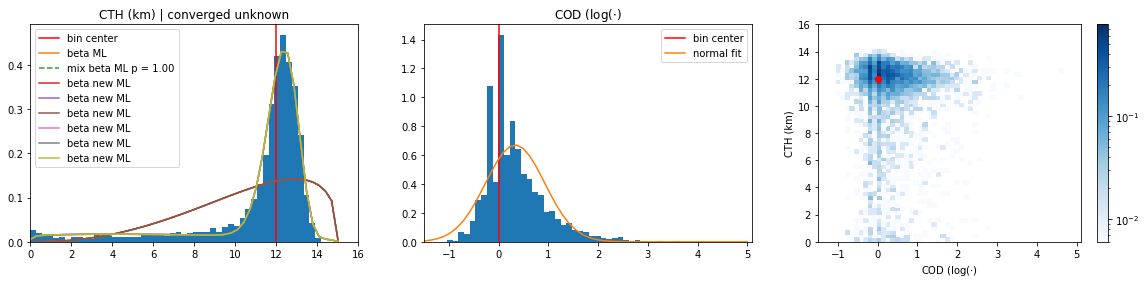

In [151]:
L = MyMixBetaML(h, h).fit([.5, 5, 10, 1, .8])
print(L.summary())

param = pd.DataFrame(L.params.T, index = ['alpha1', 'beta1', 'alpha2', 'beta2', 'p']).T
print(param)
p = param.p.values[0] 

ax[0].plot(H * 1e-3, pdf_bmix(H_norm, *L.params) / 15, label = 'beta new ML')
ax[0].legend()
fig